In [1]:
# 訓練データとテストデータの画像を読み込む
# （サイズは縦横224pxにリサイズする）
import tensorflow as tf

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "dog_cat_photos/train",
    image_size=(224, 224),
    label_mode="binary",
    batch_size=32,
    shuffle=True)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "dog_cat_photos/test",
    image_size=(224, 224),
    label_mode="binary",
    batch_size=32,
    shuffle=False
)

c:\Users\boobo\Downloads\pythondev\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


Found 300 files belonging to 2 classes.
Found 100 files belonging to 2 classes.


In [2]:
list(train_dataset.as_numpy_iterator())[0]

(array([[[[1.80000000e+02, 1.93000000e+02, 2.01000000e+02],
          [1.79997772e+02, 1.92997772e+02, 2.00997772e+02],
          [1.79662949e+02, 1.92662949e+02, 2.00662949e+02],
          ...,
          [1.97685257e+02, 2.01685257e+02, 2.04685257e+02],
          [1.96011139e+02, 2.00011139e+02, 2.03011139e+02],
          [1.96000000e+02, 2.00000000e+02, 2.03000000e+02]],
 
         [[1.80000000e+02, 1.93000000e+02, 2.01000000e+02],
          [1.79997772e+02, 1.92997772e+02, 2.00997772e+02],
          [1.79662949e+02, 1.92662949e+02, 2.00662949e+02],
          ...,
          [1.97692688e+02, 2.01692688e+02, 2.04692688e+02],
          [1.96020050e+02, 2.00020050e+02, 2.03020050e+02],
          [1.96008926e+02, 2.00008926e+02, 2.03008926e+02]],
 
         [[1.80000000e+02, 1.93000000e+02, 2.01000000e+02],
          [1.79997772e+02, 1.92997772e+02, 2.00997772e+02],
          [1.79662949e+02, 1.92662949e+02, 2.00662949e+02],
          ...,
          [1.98806259e+02, 2.02806259e+02, 2.0580

In [3]:
class_names = train_dataset.class_names
class_names

['cat', 'dog']

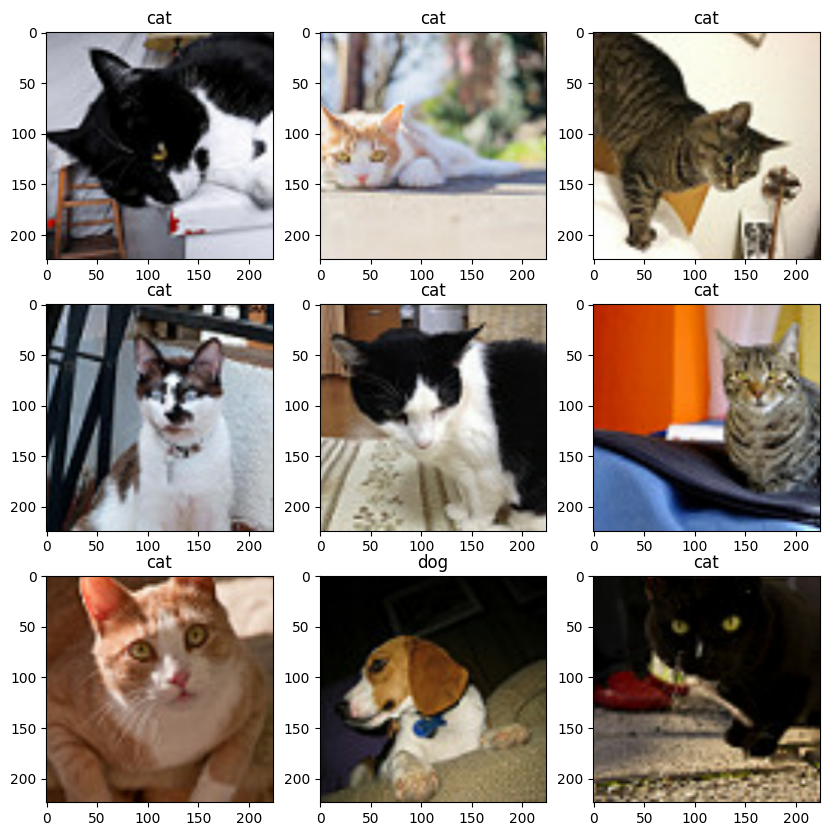

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i].numpy().astype("uint8")[0]])

In [5]:
def flip_left_right(image, label):   # 左右反転
    image = tf.image.flip_left_right(image)
    return image, label

def flip_up_down(image, label):      # 上下反転
    image = tf.image.flip_up_down(image)
    return image, label

def rot90(image, label):             # 反時計回りに90度回転
    image = tf.image.rot90(image)
    return image, label

def rot180(image, label):            # 反時計回りに180度回転
    image = tf.image.rot90(image, k=2)
    return image, label

def rot270(image, label):            # 反時計回りに270度回転
    image = tf.image.rot90(image, k=3)
    return image, label

In [6]:
# 画像の水増し処理の実行
train_dataset_lr     = train_dataset.map(flip_left_right)
train_dataset_ud     = train_dataset.map(flip_up_down)
train_dataset_rot90  = train_dataset.map(rot90)
train_dataset_rot180 = train_dataset.map(rot180)
train_dataset_rot270 = train_dataset.map(rot270)

In [7]:
# 水増ししたデータを訓練データに追加する
train_dataset = train_dataset.concatenate(train_dataset_lr)
train_dataset = train_dataset.concatenate(train_dataset_ud)
train_dataset = train_dataset.concatenate(train_dataset_rot90)
train_dataset = train_dataset.concatenate(train_dataset_rot180)
train_dataset = train_dataset.concatenate(train_dataset_rot270)

In [8]:
# データをシャッフルする
train_dataset = train_dataset.shuffle(32)


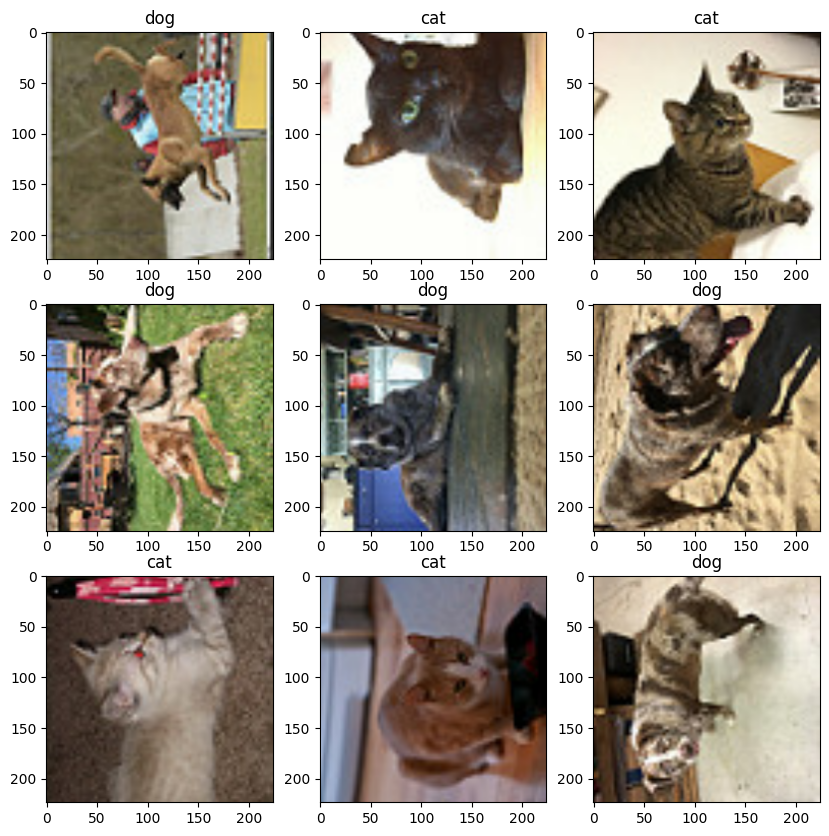

In [9]:
# 訓練データの一部を表示して確認
plt.figure(figsize=(10, 10))

for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i].numpy().astype("uint8")[0]])

In [10]:
# MobileNetV2モデルを作成する
input_layer = tf.keras.Input(shape=(224, 224, 3))   # 入力層
l_layer = tf.keras.applications.mobilenet_v2.preprocess_input(input_layer)   # 前処理（正規化）をする層

base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=(224, 224, 3),
    input_tensor=l_layer,
    include_top=False,
    weights="imagenet",
    pooling='avg'
)
base_model.trainable = False

In [11]:
# Dense層を追加する
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')

In [12]:
# base_modelに先ほどのDense層を追加したモデルを作成する
model = tf.keras.Sequential([
    base_model,
    output_layer
])

In [13]:
# modelをcompileする
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=["accuracy"])


In [14]:
# modelに学習させる
model.fit(train_dataset, epochs=20)

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 227ms/step - accuracy: 0.8300 - loss: 0.3792
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 228ms/step - accuracy: 0.9272 - loss: 0.2008
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 15s 235ms/step - accuracy: 0.9489 - loss: 0.1522
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 227ms/step - accuracy: 0.9561 - loss: 0.1315
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 15s 244ms/step - accuracy: 0.9683 - loss: 0.1114
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 233ms/step - accuracy: 0.9772 - loss: 0.0931
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 15s 232ms/step - accuracy: 0.9744 - loss: 0.0906
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 15s 237ms/step - accuracy: 0.9833 - loss: 0.0744
Epoch 9/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 15s 238ms/step - accuracy: 0.9856 - loss: 0.0661
Epoch 10/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 232ms/step - accuracy: 0.9889 - loss: 0.0606
Epoch 11/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 15s 233ms/step - accuracy: 0.9900 - loss: 0.0550
Epoch 12/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 15

In [15]:
# テストデータで分類を実行する
pred_data = model.predict(test_dataset)

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 635ms/step


In [16]:
# 分類した結果を確認する
pred_data

array([[4.82999785e-05],
       [2.96079321e-04],
       [5.51135527e-05],
       [1.01949065e-03],
       [1.41685072e-03],
       [7.32166693e-04],
       [1.00749463e-03],
       [6.34278753e-04],
       [8.07370816e-06],
       [4.11354471e-04],
       [7.27063598e-05],
       [9.78666730e-03],
       [5.89987496e-03],
       [1.02607661e-03],
       [1.22253827e-04],
       [1.47214660e-05],
       [1.89011262e-04],
       [5.74902340e-04],
       [7.03639910e-03],
       [2.17768713e-03],
       [1.40771875e-02],
       [1.50995910e-01],
       [4.15839721e-03],
       [4.71023493e-04],
       [1.86899498e-01],
       [1.50278350e-03],
       [1.27700553e-03],
       [9.46870947e-04],
       [1.05672283e-02],
       [1.86818026e-04],
       [9.56393313e-04],
       [7.14277387e-01],
       [4.18509298e-04],
       [1.82737585e-03],
       [9.30906646e-03],
       [9.34457242e-01],
       [1.19298585e-02],
       [1.23000506e-03],
       [2.57793721e-02],
       [7.26056402e-04],


In [17]:
# evaluate()でモデルの性能を評価する
model.evaluate(test_dataset)

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 185ms/step - accuracy: 0.9700 - loss: 0.0666


[0.06663014739751816, 0.9700000286102295]